<a href="https://colab.research.google.com/github/badriadhikari/2019-Fall-AI/blob/master/Logistic_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Logistic Regression Example using the Iris Flower Dataset  
* We would like to predict if a given data point (one row) belongs to the 'Iris-setosa' class
* Dataset: [rawdata](https://raw.githubusercontent.com/badriadhikari/2019-Fall-AI/master/MODULE-I/iris.data) and [metadata](https://raw.githubusercontent.com/badriadhikari/2019-Fall-AI/master/MODULE-I/iris.names)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

datapath = 'https://raw.githubusercontent.com/badriadhikari/2019-Fall-AI/master/MODULE-I/iris.data'
dataset = np.genfromtxt(datapath, delimiter=",", dtype = str)

print('')
print(dataset.shape)
print('')
print(dataset[0:5])

dataset[:, 4] = np.where(dataset[:, 4] == 'Iris-setosa', 1, 0)
#dataset[:, 4] = np.where(dataset[:, 4] == 'Iris-versicolor', 1, 0)
#dataset[:, 4] = np.where(dataset[:, 4] == 'Iris-virginica', 1, 0)

dataset = dataset.astype(float)
print('')
print(dataset[0:5])

np.random.shuffle(dataset)
print('')
print(dataset[0:5])

train = dataset[:100]
valid = dataset[100:]
print('')
print(train.shape)
print('')
print(valid.shape)


(150, 5)

[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']]

[[5.1 3.5 1.4 0.2 1. ]
 [4.9 3.  1.4 0.2 1. ]
 [4.7 3.2 1.3 0.2 1. ]
 [4.6 3.1 1.5 0.2 1. ]
 [5.  3.6 1.4 0.2 1. ]]

[[6.1 2.8 4.  1.3 0. ]
 [5.  3.3 1.4 0.2 1. ]
 [6.4 2.7 5.3 1.9 0. ]
 [5.7 2.5 5.  2.  0. ]
 [4.8 3.4 1.9 0.2 1. ]]

(100, 5)

(50, 5)


In [26]:
train_input = train[:, 0:4]
train_output = train[:, 4]
valid_input = valid[:, 0:4]
valid_output = valid[:, 4]

print('')
print(train_input[0:5])
print('')
print(train_output[0:5])


[[6.1 2.8 4.  1.3]
 [5.  3.3 1.4 0.2]
 [6.4 2.7 5.3 1.9]
 [5.7 2.5 5.  2. ]
 [4.8 3.4 1.9 0.2]]

[0. 1. 0. 0. 1.]


In [27]:
print(len(train_output), train_output.sum())
print(len(valid_output), valid_output.sum())

100 35.0
50 15.0


In [38]:
model = Sequential()
model.add(Dense(1, input_dim = 4, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_input, train_output, epochs=32 
                    ,batch_size=4, verbose = 2
                    ,validation_data = (valid_input, valid_output))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
Train on 100 samples, validate on 50 samples
Epoch 1/32
 - 0s - loss: 0.8565 - acc: 0.6500 - val_loss: 0.7429 - val_acc: 0.7000
Epoch 2/32
 - 0s - loss: 0.8254 - acc: 0.6500 - val_loss: 0.7216 - val_acc: 0.7000
Epoch 3/32
 - 0s - loss: 0.7976 - acc: 0.6500 - val_loss: 0.7002 - val_acc: 0.7000
Epoch 4/32
 - 0s - loss: 0.7744 - acc: 0.6500 - val_loss: 0.6831 - val_acc: 0.7000
Epoch 5/32
 - 0s - loss: 0.7515 - acc: 0.6500 - val_loss: 0.6651 - val_acc: 0.7000
Epoch 6/32
 - 0s - loss: 0.7311 - acc: 0.6500 - val_loss: 0.6501 - val_acc: 0.7000
Epoch 7/32
 - 0s - loss: 0.7123 - acc: 0.6500 - val_loss: 0.6351 - val_acc: 0.7000
Epoch 8/32
 - 0s - loss: 0.6957 - acc: 0.6500

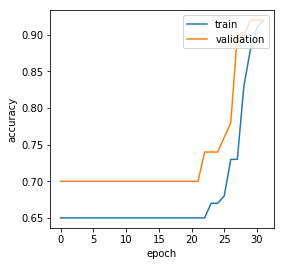

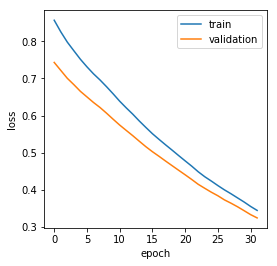

In [39]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [40]:
np.set_printoptions(precision = 2)
print ('True Validation Data:')
print(valid_output[0:5])
prediction = model.predict(valid_input)
print ('Prediction:')
print(prediction[0:5].T)

True Validation Data:
[0. 0. 1. 1. 1.]
Prediction:
[[0.26 0.22 0.55 0.56 0.56]]
